In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('/Users/mohit-raj/Desktop/Assignments/Flight Price/flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
#Feature Engineering
#Starting with Date of Journey
df["Date_of_Journey"] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y")

In [7]:
#extract components
df['Date'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Date             10683 non-null  int64         
 12  Month            10683 non-null  int64         
 13  Year             10683 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object

In [10]:
#Since we have created separate columns, we can drop the date of journey column
df.drop('Date_of_Journey', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [12]:
df['Arrival_Time'].str.split(':').str[0]

0        01
1        13
2        04
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_Time, Length: 10683, dtype: object

In [15]:
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minute'] = df['Arrival_Time'].str.split(':').str[1].str[:2]

In [16]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [17]:
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)
df['Arrival_Minute']=df['Arrival_Minute'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
 13  Arrival_Hour     10683 non-null  int64 
 14  Arrival_Minute   10683 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 1.2+ MB


In [19]:
df.drop('Arrival_Time', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [21]:
df['Dep_Time'].str.split(':').str[0]

0        22
1        05
2        09
3        18
4        16
         ..
10678    19
10679    20
10680    08
10681    11
10682    10
Name: Dep_Time, Length: 10683, dtype: object

In [23]:
df['Departure_Hour']=df['Dep_Time'].str.split(':').str[0]
df['Departure_Time']=df['Dep_Time'].str.split(':').str[1]

#We created a new column named 'Departure_Time' instead of 'Departure_Minute'. So, let's create the column we needed.

In [26]:
df['Departure_Minute'] = df['Departure_Time']

In [27]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Time,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,05,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,50


In [28]:
df['Departure_Hour']= df['Departure_Hour'].astype(int)
df['Departure_Minute'] = df['Departure_Minute'].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Dep_Time          10683 non-null  object
 5   Duration          10683 non-null  object
 6   Total_Stops       10682 non-null  object
 7   Additional_Info   10683 non-null  object
 8   Price             10683 non-null  int64 
 9   Date              10683 non-null  int64 
 10  Month             10683 non-null  int64 
 11  Year              10683 non-null  int64 
 12  Arrival_Hour      10683 non-null  int64 
 13  Arrival_Minute    10683 non-null  int64 
 14  Departure_Hour    10683 non-null  int64 
 15  Departure_Time    10683 non-null  object
 16  Departure_Minute  10683 non-null  int64 
dtypes: int64(8),

Now, let's drop the column 'Dep_Time' and also 'Depature_Time' that we created by mistake

In [30]:
df.drop(['Dep_Time', 'Departure_Time'], axis=1, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10683 non-null  object
 5   Total_Stops       10682 non-null  object
 6   Additional_Info   10683 non-null  object
 7   Price             10683 non-null  int64 
 8   Date              10683 non-null  int64 
 9   Month             10683 non-null  int64 
 10  Year              10683 non-null  int64 
 11  Arrival_Hour      10683 non-null  int64 
 12  Arrival_Minute    10683 non-null  int64 
 13  Departure_Hour    10683 non-null  int64 
 14  Departure_Minute  10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


In [33]:
#There seems to some null values in the Total_Stops column. Let's check it
df['Total_Stops'].isnull().sum()

1

In [34]:
#There is only 1 record so we can drop it. However, let's fill it with mode
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [35]:
df['Total_Stops'].isnull().sum()

0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10683 non-null  object
 5   Total_Stops       10683 non-null  object
 6   Additional_Info   10683 non-null  object
 7   Price             10683 non-null  int64 
 8   Date              10683 non-null  int64 
 9   Month             10683 non-null  int64 
 10  Year              10683 non-null  int64 
 11  Arrival_Hour      10683 non-null  int64 
 12  Arrival_Minute    10683 non-null  int64 
 13  Departure_Hour    10683 non-null  int64 
 14  Departure_Minute  10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


In [37]:
#now, let's try to fix the 'Total_Stops' column
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [39]:
#Let's give labels to these stops, replacing non-stop with 0, 1 stop with 1, etc.
df['Total_Stops']= df['Total_Stops'].map({'non-stop': 0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [40]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


In [49]:
df['Duration'].str.extract(r'(\d+)h').fillna(0)

,0
0,2
1,7
2,19
3,5
4,4
...,...
10678,2
10679,2
10680,3
10681,2


In [50]:
df['Duration_Hour']=df['Duration'].str.extract(r'(\d+)h').fillna(0)

In [52]:
df['Duration_Minute']=df['Duration'].str.extract(r'(\d+)m').fillna(0)

In [55]:
df['Duration_Hour']=df['Duration_Hour'].astype(int)
df['Duration_Minute']=df['Duration_Minute'].astype(int)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10683 non-null  object
 5   Total_Stops       10683 non-null  int64 
 6   Additional_Info   10683 non-null  object
 7   Price             10683 non-null  int64 
 8   Date              10683 non-null  int64 
 9   Month             10683 non-null  int64 
 10  Year              10683 non-null  int64 
 11  Arrival_Hour      10683 non-null  int64 
 12  Arrival_Minute    10683 non-null  int64 
 13  Departure_Hour    10683 non-null  int64 
 14  Departure_Minute  10683 non-null  int64 
 15  Duration_Hour     10683 non-null  int64 
 16  Duration_Minute   10683 non-null  int64 
dtypes: int64(11)

In [57]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,4,45


In [58]:
df['Total_Duration'] = df['Duration_Hour']*60 +df['Duration_Minute']
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute,Total_Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,4,45,285


In [59]:
df.drop('Duration', axis=1, inplace=True)

In [60]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute,Total_Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,2019,4,25,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,2019,23,30,18,5,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,2019,21,35,16,50,4,45,285


In [61]:
from sklearn.preprocessing import OneHotEncoder

In [62]:
encoder=OneHotEncoder()

In [63]:
encoded = encoder.fit_transform(df[['Airline', 'Source', 'Destination', 'Additional_Info']]).toarray()

In [65]:
df1=pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

In [67]:
df1.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [68]:
df = pd.concat([df, df1], axis=1)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Airline                                       10683 non-null  object 
 1   Source                                        10683 non-null  object 
 2   Destination                                   10683 non-null  object 
 3   Route                                         10682 non-null  object 
 4   Total_Stops                                   10683 non-null  int64  
 5   Additional_Info                               10683 non-null  object 
 6   Price                                         10683 non-null  int64  
 7   Date                                          10683 non-null  int64  
 8   Month                                         10683 non-null  int64  
 9   Year                                          10683 non-null 

In [70]:
# Now the data is fit to be fed to a model. However, since we are focussing on EDA here 
# and plotting the data, let's drop the encoded part
df=df.drop(columns=df1.columns)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute,Total_Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,2019,4,25,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,2019,23,30,18,5,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,2019,21,35,16,50,4,45,285


In [71]:
#since we already have the total duration column, we will be dropping the 'Duration_HOur' and 'Duration_Minute' columns
df.drop(columns=['Duration_Hour', 'Duration_Minute'])

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Total_Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,2019,21,35,16,50,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,No info,4107,9,4,2019,22,25,19,55,150
10679,Air India,Kolkata,Banglore,CCU → BLR,0,No info,4145,27,4,2019,23,20,20,45,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,No info,7229,27,4,2019,11,20,8,20,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,0,No info,12648,1,3,2019,14,10,11,30,160


In [111]:
df['Year'].value_counts()

2019    10683
Name: Year, dtype: int64

In [112]:
#As the data is entirely of 2019, we can drop the year column
df.drop('Year', axis=1, inplace=True)

In [113]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute,Total_Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,4,25,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,23,30,18,5,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,21,35,16,50,4,45,285


#now our data is ready. Let's perform the EDA

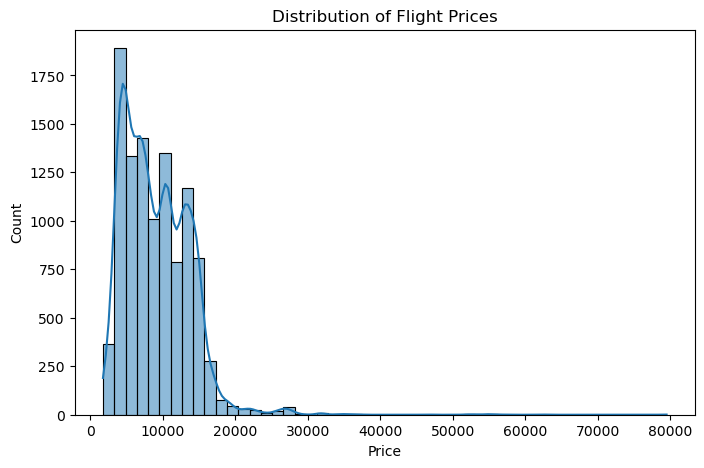

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Distribution of Flight Prices")
plt.show()

### Categorical Variables vs Price

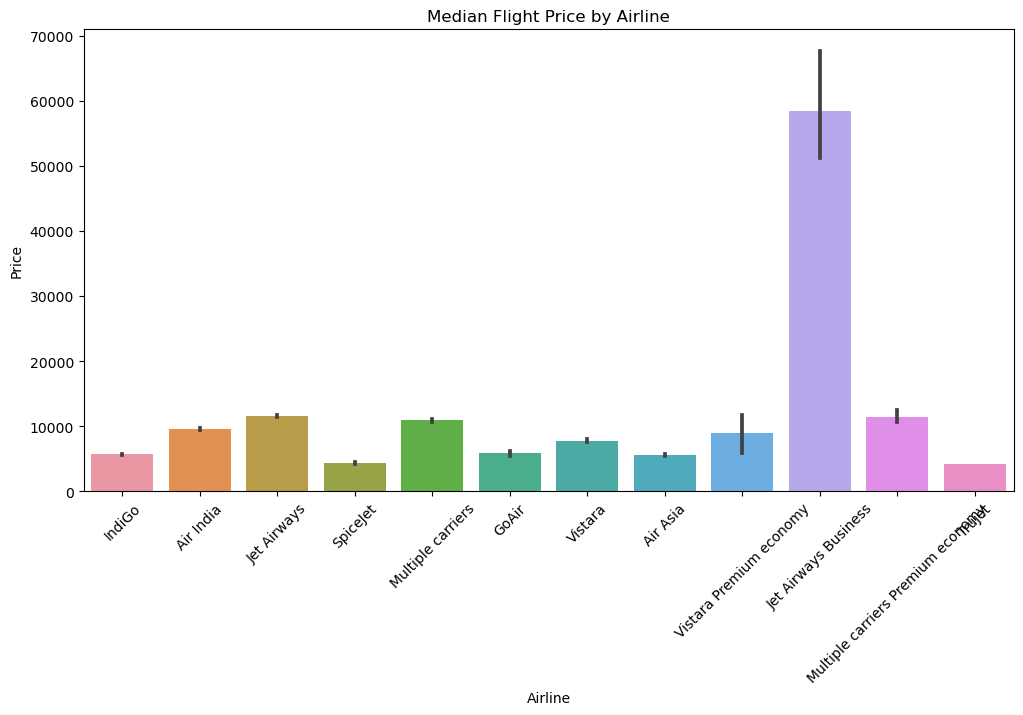

In [82]:
import numpy as np

plt.figure(figsize=(12,6))
sns.barplot(x='Airline', y='Price', data=df)
plt.title("Median Flight Price by Airline")
plt.xticks(rotation=45)
plt.show()

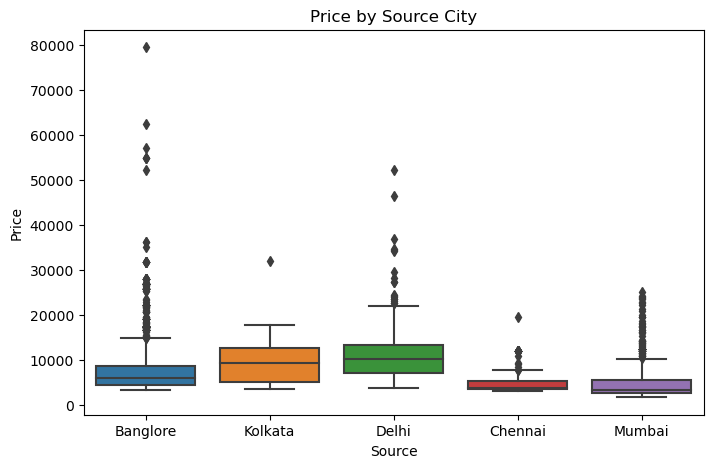

In [85]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Source', y='Price', data=df)
plt.title("Price by Source City")
plt.show()

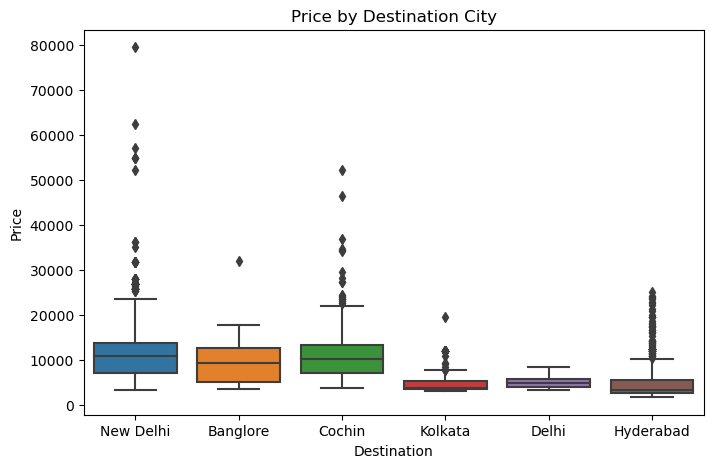

In [86]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Destination', y='Price', data=df)
plt.title("Price by Destination City")
plt.show()

### Numerical Variables vs Price

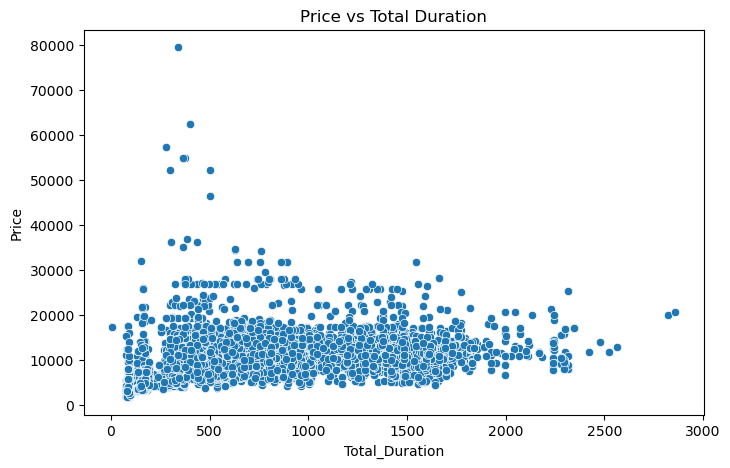

In [87]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Total_Duration', y='Price', data=df)
plt.title("Price vs Total Duration")
plt.show()

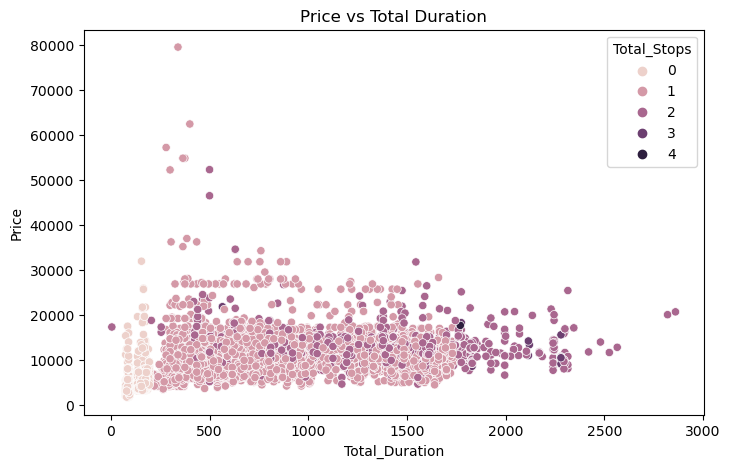

In [99]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Total_Duration', y='Price', hue='Total_Stops', data=df)
plt.title("Price vs Total Duration")
plt.show()

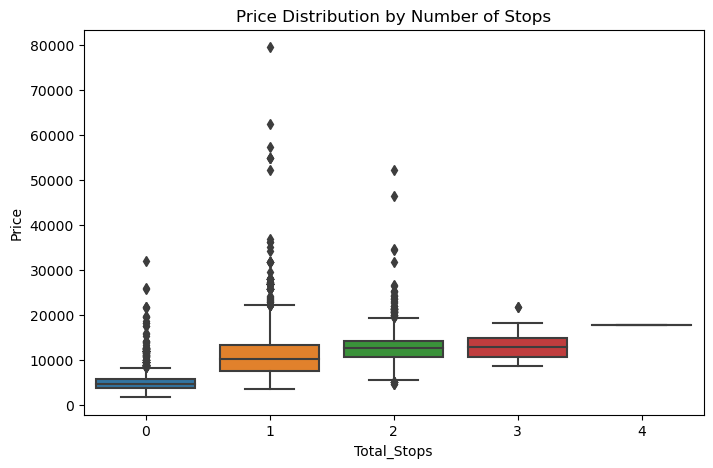

In [97]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title("Price Distribution by Number of Stops")
plt.show()

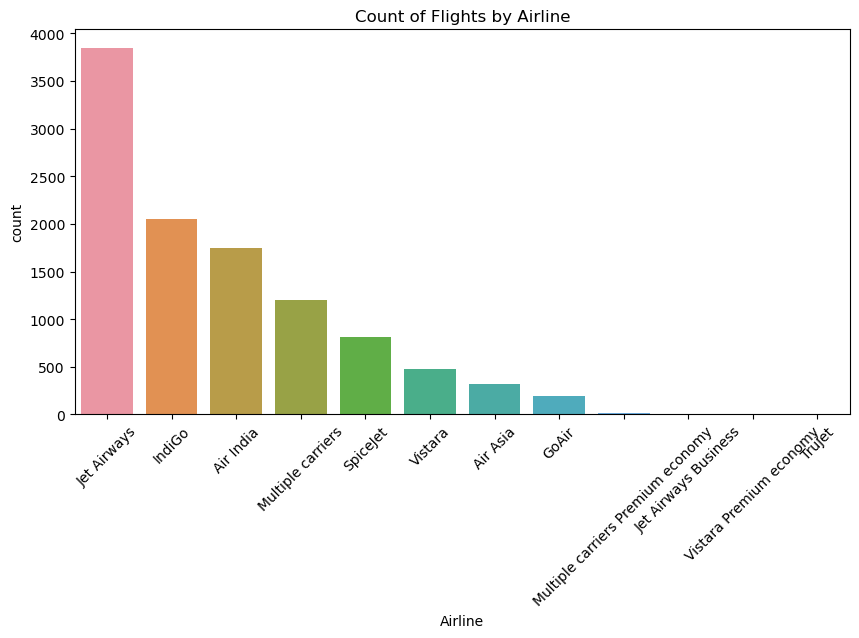

In [92]:
plt.figure(figsize=(10,5))
sns.countplot(x='Airline', data=df, order=df['Airline'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Count of Flights by Airline")
plt.show()

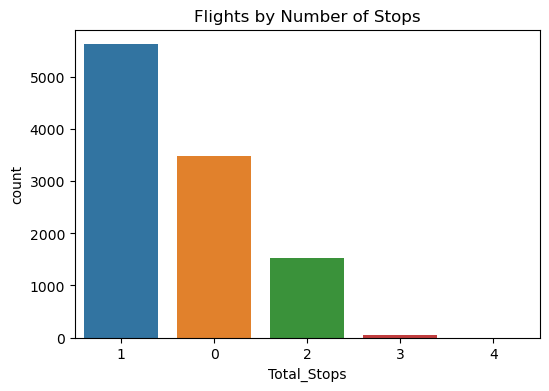

In [93]:
plt.figure(figsize=(6,4))
sns.countplot(x='Total_Stops', data=df, order=df['Total_Stops'].value_counts().index)
plt.title("Flights by Number of Stops")
plt.show()

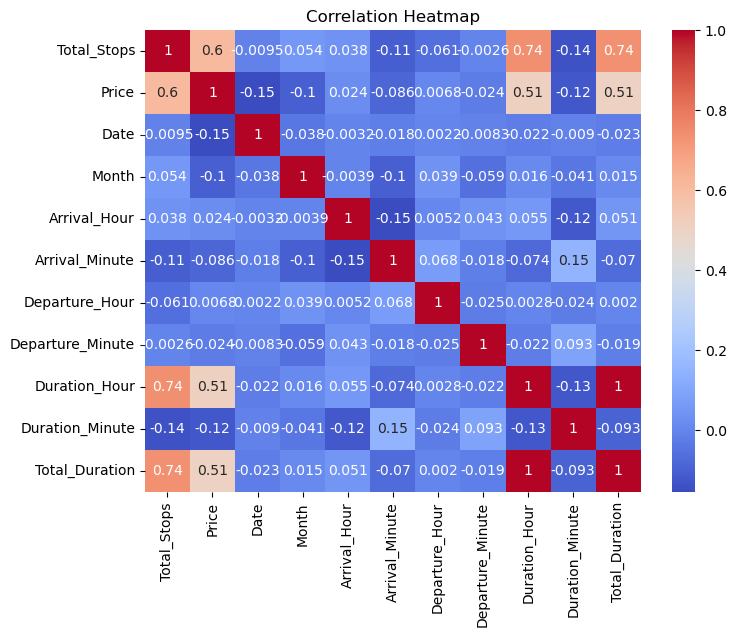

In [114]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

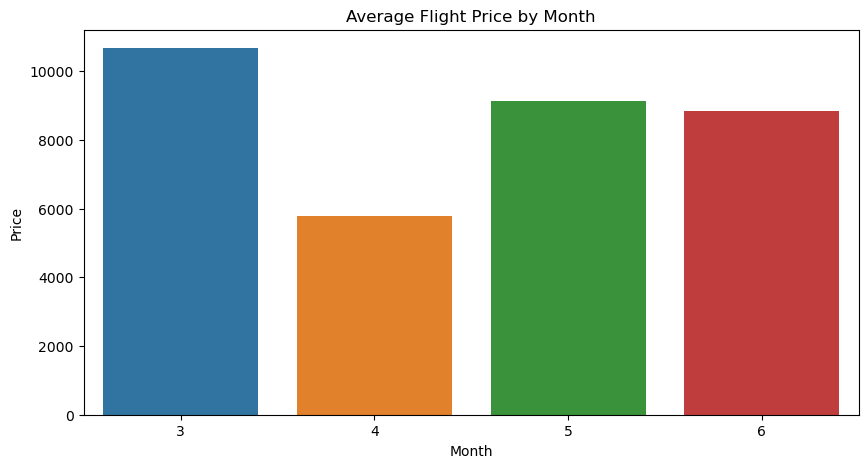

In [115]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month', y='Price', data=df, estimator=np.mean, ci=None)
plt.title("Average Flight Price by Month")
plt.show()